In [1]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount)<1: drive.mount('/content/drive')


# CNN Example From Flowers by Keras (Color Version)


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import datasets, layers, models, regularizers,Model

from os import listdir
from os.path import isfile, join
import random
import warnings

import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam



IMG_W=224
IMG_H=224

In [3]:
def getFolder(thePath,isFile=True):
    return [f for f in listdir(thePath) if isFile == isfile(join(thePath, f)) ]


def getImagesAndLabels(tPath):
    labels=getFolder(tPath,False)
    encoder={w: i for i, w in enumerate(labels)}
    decoder={i: w  for i, w in enumerate(labels)}
    tImages,tLabels=None,None

    for label in labels:
        imgFolder=join(tPath,label)
        files= [f for f in listdir(imgFolder) if isfile(join(imgFolder, f))]
        for file in files:
            imageFile=join(imgFolder,file)
            img=plt.imread(imageFile)
            img = cv2.resize(img, (IMG_W,IMG_H))
            if tImages is None:
                tImages, tLabels =[img], np.array([encoder[label]],ndmin=1)
            else:
                tImages.append( img )
                tLabels = np.append(tLabels,np.array([encoder[label]]) ,axis=0) 
        print("finish=",label,"total=",len(tImages))
    return (tImages,tLabels,encoder,decoder,len(labels))

In [4]:
%%bash
x=$(dpkg -l|grep imagemagick);[ ${#x} -eq 0 ]&&sudo apt install -y imagemagick
[ ! -f /content/drive/MyDrive/Lec_Capture/_data/flower_photos.tgz  ]&&wget http://download.tensorflow.org/example_images/flower_photos.tgz -O /content/drive/MyDrive/Lec_Capture/_data/flower_photos.tgz 
tar xzf /content/drive/MyDrive/Lec_Capture/_data/flower_photos.tgz 
find ./flower_photos|grep jpg|head -n 10|xargs -i -t identify {} 2>>/tmp/log

./flower_photos/roses/2788276815_8f730bd942.jpg JPEG 500x357 500x357+0+0 8-bit sRGB 119KB 0.000u 0:00.000
./flower_photos/roses/4998708839_c53ee536a8_n.jpg JPEG 320x240 320x240+0+0 8-bit sRGB 33.4KB 0.000u 0:00.000
./flower_photos/roses/4363734507_5cc4ed6e01.jpg JPEG 500x434 500x434+0+0 8-bit sRGB 105KB 0.000u 0:00.000
./flower_photos/roses/9702378513_229a96b754_m.jpg JPEG 240x240 240x240+0+0 8-bit sRGB 22.9KB 0.000u 0:00.000
./flower_photos/roses/3422228549_f147d6e642.jpg JPEG 500x329 500x329+0+0 8-bit sRGB 193KB 0.000u 0:00.000
./flower_photos/roses/7683456068_02644b8382_m.jpg JPEG 180x240 180x240+0+0 8-bit sRGB 14.8KB 0.000u 0:00.000
./flower_photos/roses/2677417735_a697052d2d_n.jpg JPEG 320x240 320x240+0+0 8-bit sRGB 29.9KB 0.000u 0:00.000
./flower_photos/roses/505517255_cfbb6f6394.jpg JPEG 500x331 500x331+0+0 8-bit sRGB 99.1KB 0.000u 0:00.000
./flower_photos/roses/2414954629_3708a1a04d.jpg JPEG 500x334 500x334+0+0 8-bit sRGB 73.7KB 0.000u 0:00.009
./flower_photos/roses/9164900485_

In [5]:
from sklearn.model_selection import train_test_split
basePath='./flower_photos'
imgs,labels,encoder,decoder,class_cnt=getImagesAndLabels(basePath)


finish= roses total= 641
finish= dandelion total= 1539
finish= daisy total= 2172
finish= tulips total= 2971
finish= sunflowers total= 3670


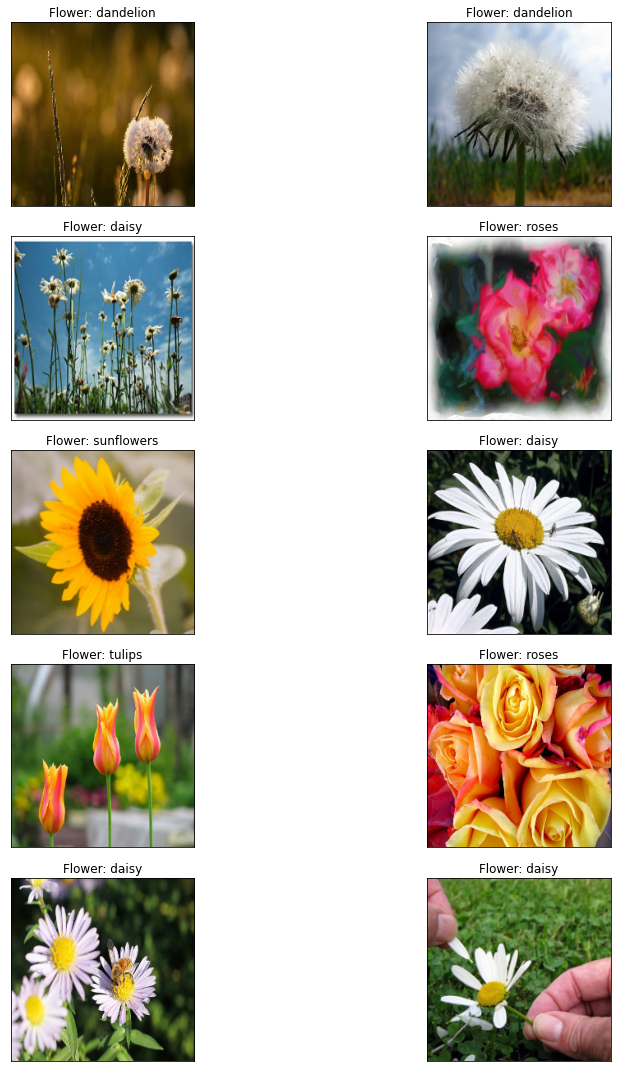

In [6]:
count=0
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range (2):
        l=random.randint(0,len(imgs))
        ax[i,j].imshow(imgs[l])
        ax[i,j].set_title('Flower: '+ decoder[labels[l]])
        ax[i,j].grid(False)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        count+=1
plt.tight_layout()


In [7]:
le=LabelEncoder()
labels=np.array(labels)

Y=le.fit_transform(labels)
Y=to_categorical(Y,class_cnt)
imgs=np.array(imgs)

In [8]:
train_images,test_images,train_labels,test_labels=train_test_split(imgs,labels,test_size=0.25, random_state=88)


In [9]:
np.random.seed(42)
random.seed(42)
tf.compat.v1.set_random_seed(42)

In [10]:
from tensorflow.python.keras.applications.vgg16 import VGG16

model=models.Sequential()
model.add(VGG16(weights='imagenet'))
# model.summary()

inp=layers.Input(shape=(224,224,3))
out=VGG16(weights='imagenet')(inp)
model=Model(inputs=inp,outputs=out)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 1000)              138357544 
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0
_________________________________________________________________


In [11]:
History=model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20,batch_size=100)

Epoch 1/20
28/28 [==============================] - 12s 427ms/step - loss: 15.8750 - accuracy: 0.1999
Epoch 2/20
28/28 [==============================] - 11s 381ms/step - loss: 1.6313 - accuracy: 0.2442
Epoch 3/20
28/28 [==============================] - 11s 383ms/step - loss: 1.5278 - accuracy: 0.3067
Epoch 4/20
28/28 [==============================] - 11s 382ms/step - loss: 1.4291 - accuracy: 0.3626
Epoch 5/20
28/28 [==============================] - 11s 382ms/step - loss: 1.3479 - accuracy: 0.4262
Epoch 6/20
28/28 [==============================] - 11s 382ms/step - loss: 1.2351 - accuracy: 0.4760
Epoch 7/20
28/28 [==============================] - 11s 383ms/step - loss: 1.1633 - accuracy: 0.5138
Epoch 8/20
28/28 [==============================] - 11s 383ms/step - loss: 1.1422 - accuracy: 0.5251
Epoch 9/20
28/28 [==============================] - 11s 384ms/step - loss: 1.1310 - accuracy: 0.5276
Epoch 10/20
28/28 [==============================] - 11s 382ms/step - loss: 1.1332 - accur

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4053651094436646
Test accuracy: 0.5882353186607361


In [13]:
# getting predictions on val set.
pred=model.predict(test_images)
pred_digits=np.argmax(pred,axis=1)

In [14]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]


print('Pred True')
for i in range(len(test_labels)):
    
    if(test_labels[i]==pred_digits[i]):
        print(test_labels[i],pred_digits[i])        
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
print('Pred False')
for i in range(len(test_labels)):
    if( test_labels[i] != pred_digits[i]):
        print(test_labels[i],pred_digits[i])        
        mis_class.append(i)
    if(len(mis_class)==8):
        break

Pred True
3 3
0 0
1 1
3 3
4 4
1 1
2 2
1 1
Pred False
0 2
2 4
0 2
3 2
3 0
3 0
1 4
3 1


--------------------------------------
 True 
--------------------------------------


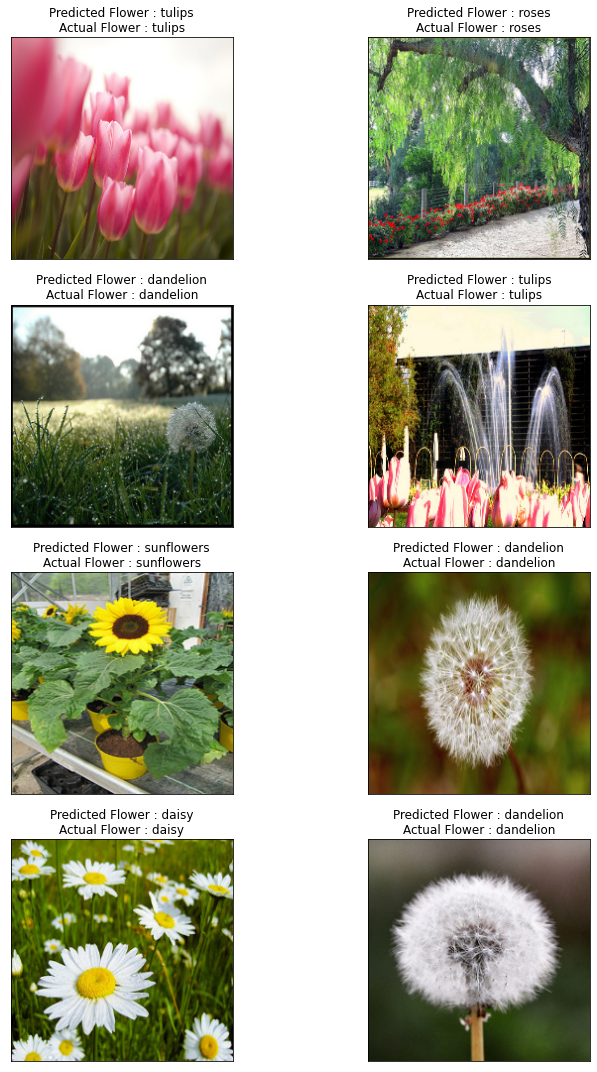

In [15]:

if len(prop_class)<8:
  print("True Prediction is lower then 8")
else:

  print('--------------------------------------')
  print(' True ')
  print('--------------------------------------')

  warnings.filterwarnings('always')
  warnings.filterwarnings('ignore')

  count=0
  fig,ax=plt.subplots(4,2)
  fig.set_size_inches(15,15)
  for i in range (4):
      for j in range (2):
          img=test_images[prop_class[count]]
          ax[i,j].imshow(img)
          ax[i,j].set_title("Predicted Flower : "+ decoder[test_labels[prop_class[count      ]]] +"\n"+ \
                            "Actual Flower : "   + decoder[test_labels[prop_class[count      ]]])
          ax[i,j].set_xticks([])
          ax[i,j].set_yticks([])

          plt.tight_layout()
          count+=1

--------------------------------------
 mis class
--------------------------------------


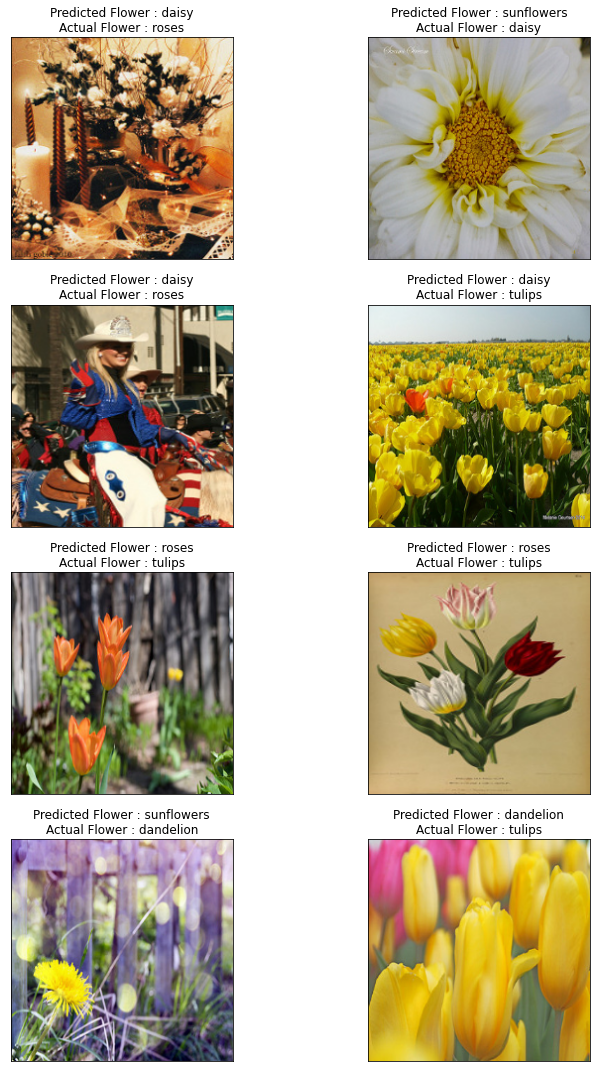

In [16]:
if len(mis_class)<8:
  print("mis_class is lower then 8")
else:
  print('--------------------------------------')
  print(' mis class')
  print('--------------------------------------')

  warnings.filterwarnings('always')
  warnings.filterwarnings('ignore')

  count=0
  fig,ax=plt.subplots(4,2)
  fig.set_size_inches(15,15)
  for i in range (4):
      for j in range (2):
          img=test_images[mis_class[count]]
          ax[i,j].imshow(img)
          ax[i,j].set_title("Predicted Flower : "+ decoder[pred_digits[mis_class[count]]] +"\n"+ \
                            "Actual Flower : "   + decoder[test_labels[mis_class[count]]])
          ax[i,j].set_xticks([])
          ax[i,j].set_yticks([])
          plt.tight_layout()
          count+=1
